# Project: Investigate a Dataset (The analysis of medical appointments no show up in Brazil)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset has got ninformation about 110k medical appointments in Brazil. This data looking into wheather did or didn't patients show up for their booked appointments and it also contains a number of characteristics about the patients.

I will be analyzing the dataset with the provided dat to check wheather can I get answers to these questions.

- What is the number of patients that show up on different days of the week?
- Which gender has the highest number of patients that did shw up for the appointment?

In [2]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

#### General Properties

In [3]:
# Load data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

noShowUp_df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')

In [4]:
noShowUp_df.head(20)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [4]:
noShowUp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
# checking for any dublicates in the dataset

print('The dataframe has got '+str(sum(noShowUp_df.duplicated()))+" duplicates.")

The dataframe has got 0 duplicates.


In [6]:
#checking if does the dataset have any missing values.

noShowUp_df.isnull().sum().any()

False

In [7]:
noShowUp_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


This data provides that the minimum age of the patient that was booked for appointment is -1, the is no way that this is true the is no person that has got a negetive age.

In [8]:
#checking for the uniqueness of the data stored in each column
noShowUp_df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

I can see from the dataset the number of Patient_ID's is less than the number Appointment_ID which means that some patients are booked more than once for the an appointment.

In [9]:
#Checking the number of rows and columns that dataset has 

print("The dataframe has got "+str(noShowUp_df.shape[0])+" "+ "rows and"+" "+str(noShowUp_df.shape[1])+" "+"columns.")

The dataframe has got 110527 rows and 14 columns.


In [10]:
noShowUp_df.AppointmentDay.unique()

array(['2016-04-29T00:00:00Z', '2016-05-03T00:00:00Z',
       '2016-05-10T00:00:00Z', '2016-05-17T00:00:00Z',
       '2016-05-24T00:00:00Z', '2016-05-31T00:00:00Z',
       '2016-05-02T00:00:00Z', '2016-05-30T00:00:00Z',
       '2016-05-16T00:00:00Z', '2016-05-04T00:00:00Z',
       '2016-05-19T00:00:00Z', '2016-05-12T00:00:00Z',
       '2016-05-06T00:00:00Z', '2016-05-20T00:00:00Z',
       '2016-05-05T00:00:00Z', '2016-05-13T00:00:00Z',
       '2016-05-09T00:00:00Z', '2016-05-25T00:00:00Z',
       '2016-05-11T00:00:00Z', '2016-05-18T00:00:00Z',
       '2016-05-14T00:00:00Z', '2016-06-02T00:00:00Z',
       '2016-06-03T00:00:00Z', '2016-06-06T00:00:00Z',
       '2016-06-07T00:00:00Z', '2016-06-01T00:00:00Z',
       '2016-06-08T00:00:00Z'], dtype=object)

I can see the dataset covers the data of appointment days from the 2016-04-29 to the 2016-06-08

### Data Cleaning 

In [6]:
# Will be dropping the row with the negative age

noShowUp_df[noShowUp_df["Age"] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [7]:
incorrectRow = noShowUp_df[noShowUp_df["Age"] == -1].index

noShowUp_df.drop(incorrectRow, inplace=True)


In [8]:
# Confirming that the row with negetive age is dropped

noShowUp_df.query('Age < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [10]:
#Some columns need to renamed and written differently on the dataset to make more sence and fix the incorrect spelling.

noShowUp_df.rename(columns = {'PatientId':'Patient_ID','AppointmentID':'Appointment_ID','ScheduledDay':'Scheduled_Day','AppointmentDay':'Appointment_Day','Alcoolism': 'Alchoholism','Hipertension': 'Hypertension','Handcap': 'Handicap', 'No-show':'No_show'}, inplace = True)
noShowUp_df.head()

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
#The Scheduled_Day and Appointment_Day data types are object, will be changing the to date time

noShowUp_df.Scheduled_Day = pd.to_datetime(noShowUp_df.Scheduled_Day)
noShowUp_df.Appointment_Day = pd.to_datetime(noShowUp_df.Appointment_Day)
noShowUp_df.dtypes

Patient_ID                float64
Appointment_ID              int64
Gender                     object
Scheduled_Day      datetime64[ns]
Appointment_Day    datetime64[ns]
Age                         int64
Neighbourhood              object
Scholarship                 int64
Hypertension                int64
Diabetes                    int64
Alcoholism                  int64
Handicap                    int64
SMS_received                int64
No_show                    object
dtype: object

## Creating columns

1 Will be creatinng a column that states the catergory of which age group the patient is in, this will help in analyzing which group showed up the most or the least for their appointments.

- Child - 0 to 13
- Teenager - 13 to 19
- Adult - 20 to 24
- Seniors - 25 to 59
- Old - greater than 60

2 Will also create columns that state the exact day in the week and month for which the appointment is booked for.

In [12]:
# Function to defining age_groups

def age_group(row):
    age = row['Age']
    if age >= 0 and age <= 12:
        return 'Child'
    elif age >= 13 and age <= 19:
        return 'Teenager'
    elif age >= 20 and age <= 24:
        return 'Adult'
    elif age >= 25 and age <=59:
        return 'Seniors'
    elif age >= 60:
        return 'Old'

In [18]:
# Creating the column Age_group using the function ontop of this cell

noShowUp_df['Age_group'] = noShowUp_df.apply(age_group, axis=1)
noShowUp_df.head()

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Age_group
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Old
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Seniors
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Old
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Child
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Seniors


In [13]:
# Creating the column Weekday_of_appointment which is going to contain the week days the appointment is scheduled for.

weekDays={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
noShowUp_df['Weekday_of_appointment'] = noShowUp_df['Appointment_Day'].dt.dayofweek.map(weekDays)
noShowUp_df.sample(10)

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Weekday_of_appointment
51873,3.774965e+13,5666750,M,2016-05-06 07:01:50,2016-05-06,89,JESUS DE NAZARETH,0,0,0,0,0,0,No,Friday
86774,5.973334e+11,5789208,F,2016-06-08 14:29:59,2016-06-08,1,ILHA DO PRÍNCIPE,0,0,0,0,0,0,No,Wednesday
84350,8.996832e+14,5698297,F,2016-05-16 07:26:49,2016-06-01,26,ILHA DO PRÍNCIPE,0,0,0,0,0,1,No,Wednesday
24714,1.725712e+14,5664629,F,2016-05-05 13:02:52,2016-05-31,21,SÃO JOSÉ,0,0,0,0,0,1,No,Tuesday
89742,6.738413e+14,5759200,M,2016-06-01 11:59:51,2016-06-06,22,SANTO ANDRÉ,0,0,0,0,0,1,Yes,Monday
4799,7.777719e+12,5702526,M,2016-05-16 12:30:12,2016-05-19,64,JARDIM CAMBURI,0,0,0,0,0,0,No,Thursday
40525,8.121397e+13,5753263,M,2016-05-31 13:45:12,2016-05-31,48,MÁRIO CYPRESTE,0,0,0,0,0,0,No,Tuesday
89184,4.658199e+14,5789483,M,2016-06-08 15:06:19,2016-06-08,10,SANTA MARTHA,0,0,0,0,0,0,No,Wednesday
72288,5.919397e+12,5658167,F,2016-05-04 10:38:11,2016-05-09,26,PRAIA DO SUÁ,0,0,0,1,0,0,Yes,Monday
72695,4.658852e+11,5660208,F,2016-05-04 15:50:24,2016-05-09,18,MATA DA PRAIA,0,0,0,0,0,0,No,Monday


In [14]:
# Creating the column Month_of_appointment which is going to contain the months the appointment is scheduled for.

month = {0:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}
noShowUp_df['Month_of_appointment'] = noShowUp_df['Appointment_Day'].dt.month.map(month)
noShowUp_df.sample(10)

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Weekday_of_appointment,Month_of_appointment
83708,4.323166e+14,5617361,M,2016-04-25 16:00:52,2016-05-03,57,JARDIM CAMBURI,0,0,0,0,0,1,No,Tuesday,May
75507,2.352316e+12,5684965,F,2016-05-11 09:29:20,2016-05-11,16,NOVA PALESTINA,0,0,0,0,0,0,No,Wednesday,May
98586,5.748824e+11,5680195,F,2016-05-10 11:20:24,2016-06-07,23,MARIA ORTIZ,1,0,0,0,0,1,No,Tuesday,June
72833,1.875448e+14,5680738,M,2016-05-10 12:32:00,2016-05-10,47,ANDORINHAS,0,0,0,0,0,0,No,Tuesday,May
69313,5.972492e+12,5713807,M,2016-05-18 10:44:10,2016-05-18,49,SÃO PEDRO,0,0,0,0,0,0,No,Wednesday,May
108827,9.496197e+12,5788270,M,2016-06-08 11:43:15,2016-06-08,35,CENTRO,0,0,0,0,0,0,No,Wednesday,June
46854,9.731585e+11,5530610,F,2016-03-31 08:28:31,2016-05-30,68,CARATOÍRA,0,1,1,0,0,1,Yes,Monday,May
10411,8.559816e+13,5658993,F,2016-05-04 12:52:46,2016-05-06,64,ILHA DO PRÍNCIPE,0,0,0,0,0,0,No,Friday,May
30290,2.168856e+13,5712226,M,2016-05-18 08:35:34,2016-05-18,16,RESISTÊNCIA,0,0,0,0,0,0,No,Wednesday,May
61569,3.449169e+14,5606685,F,2016-04-20 10:33:49,2016-05-11,28,TABUAZEIRO,0,0,0,0,0,0,Yes,Wednesday,May


<a id='eda'></a>
## Exploratory Data Analysis

I will be drawing some graphs to find some relationships between the columns

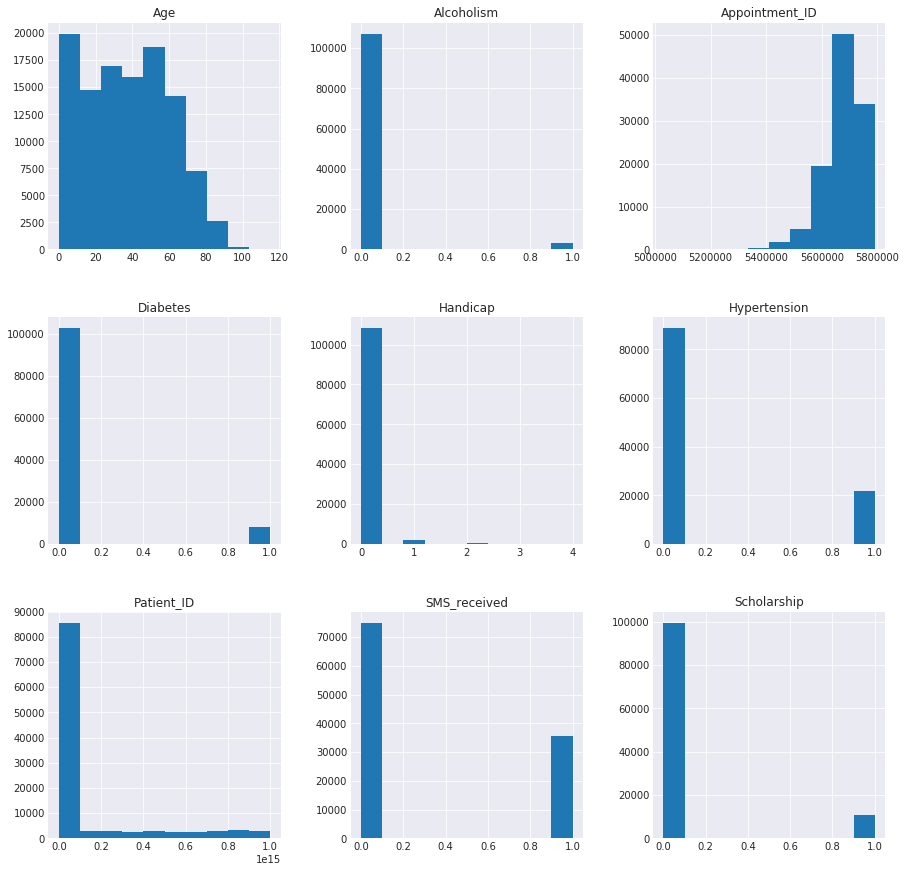

In [15]:
# checking for distribution of data within columns
sns.set_style('darkgrid')
noShowUp_df.hist(figsize=(15,15));

The histograms above give us more information about the dataset I can say a more detail and simplified information.

- You can see there are a few patients with Alcoholism as  well at Hypertwnsion.
- Most patients didn't receive the SMS
- the is a small number of patients who have got the scholarship

### Research Question 1  (What is the number of patients that show up on different days of the week?)

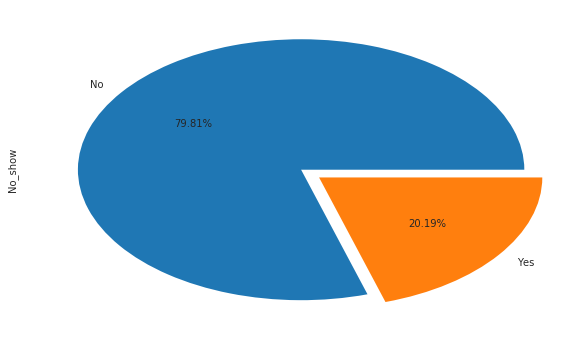

In [16]:
# This will ba a Pie graph visualization oif the percentage of patients that showed up and didn't for their appointments

noShowUp_df['No_show'].value_counts().plot(kind = 'pie', figsize = (10,6), explode = [0, 0.1], autopct = '%1.2f%%');

As represented in the pie chat above we can see that the The number of paitents that didn't show up have a high percentage as compared to thwe patients the did actual come for the their appointment.

In [17]:
# This is a list of days in order

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

In [18]:
showedUp = noShowUp_df.query('No_show == "No"')
weekDays_showUp = showedUp.groupby('Weekday_of_appointment').count().reindex(day_order)
weekDays_showUp

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Month_of_appointment
Weekday_of_appointment,,,,,,,,,,,,,,,
Monday,18024,18024,18024,18024,18024,18024,18024,18024,18024,18024,18024,18024,18024,18024,18024
Tuesday,20488,20488,20488,20488,20488,20488,20488,20488,20488,20488,20488,20488,20488,20488,20488
Wednesday,20774,20774,20774,20774,20774,20774,20774,20774,20774,20774,20774,20774,20774,20774,20774
Thursday,13909,13909,13909,13909,13909,13909,13909,13909,13909,13909,13909,13909,13909,13909,13909
Friday,14982,14982,14982,14982,14982,14982,14982,14982,14982,14982,14982,14982,14982,14982,14982
Saturday,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30


In [19]:
# This is the percentage of patients who showed up and didn't on different days of the week

noShowUp_df.groupby('Weekday_of_appointment')['No_show'].value_counts(normalize = True).unstack("No_show").reindex(day_order)

No_show,No,Yes
Weekday_of_appointment,,
Monday,0.793519,0.206481
Tuesday,0.799064,0.200936
Wednesday,0.803108,0.196892
Thursday,0.806459,0.193541
Friday,0.787739,0.212261
Saturday,0.769231,0.230769


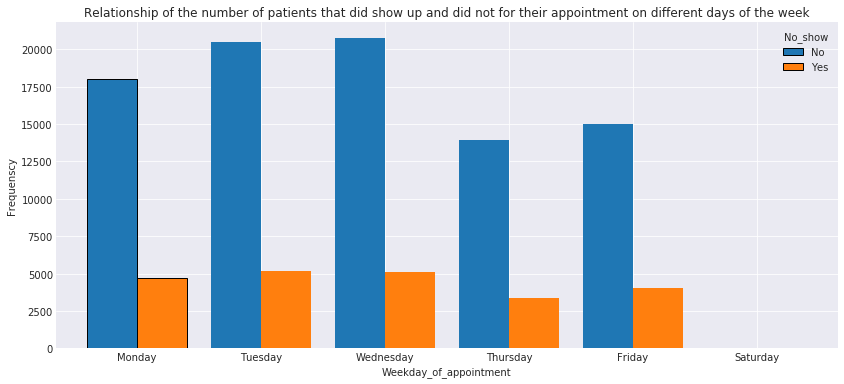

In [20]:
# Bar grap visualization representation
relationNoShow = noShowUp_df.groupby('Weekday_of_appointment')['No_show'].value_counts().unstack('No_show').mul(1).reindex(day_order).plot(kind = 'bar', title = 'Relationship of the number of patients that did show up and did not for their appointment on different days of the week', edgecolor = 'black', figsize = [14, 6], rot = 0, width = 0.8);
relationNoShow.set_ylabel('Frequenscy');

Number of patients that didn't show up for their appointment are more than the number of patient's that did actualy show up and as you can see on graph representations numbers for Friday and Saturday are low as compared to other days more specifically on Saturdfay which is during the wweekend.

### Research Question 2  (Which gender has the highest number of patients that did show up for the appointment?)

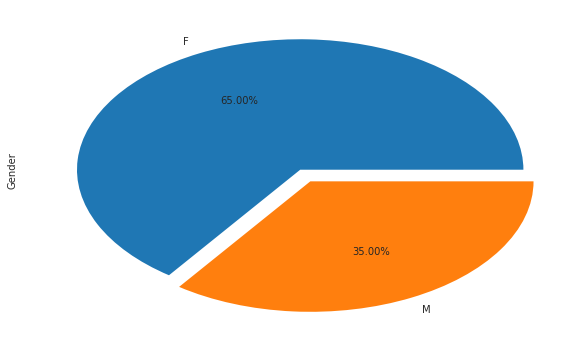

In [21]:
# This will ba a Pie graph visualization of the percentage of the patient's genders

noShowUp_df['Gender'].value_counts().plot(kind = 'pie', figsize = (10,6), explode = [0, 0.1], autopct = '%1.2f%%');

As represented by the pie chat above we can see that thge number of Female patients who had appointments were more than the males.

In [48]:
# namber of patients that showed up for their appointment
showedUp = noShowUp_df.query('No_show == "No"')
gender_showedUp = showedUp.groupby('Gender').count()
perc = gender_showedUp.No_show / sum(gender_showedUp.No_show)
gender_showedUp

,Patient_ID,Appointment_ID,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Age_group,Month_of_appointment,Weekday_of_appointment
Gender,,,,,,,,,,,,,,,,
F,57245,57245,57245,57245,57245,57245,57245,57245,57245,57245,57245,57245,57245,57245,57245,57245
M,30962,30962,30962,30962,30962,30962,30962,30962,30962,30962,30962,30962,30962,30962,30962,30962


In [77]:
noShowUp_df.groupby('Gender')['No_show'].value_counts(normalize = True).unstack("No_show")

No_show,No,Yes
Gender,,
F,0.796851,0.203149
M,0.800321,0.199679


Information above shows the percentage of differnt genders that did show up and didn't for their appointment.

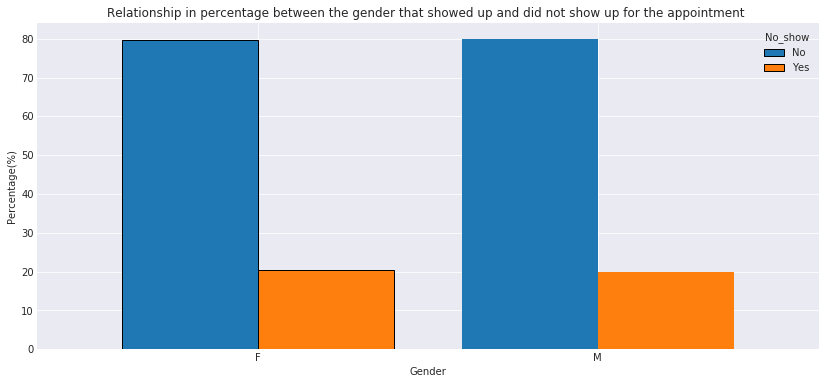

In [80]:
# Bar graph ilustrating the number of male and female that showed up for their appointment

relationGender = noShowUp_df.groupby('Gender')['No_show'].value_counts(normalize = True).unstack('No_show').mul(100).plot(kind = 'bar', title = 'Relationship in percentage between the gender that showed up and did not show up for the appointment ', edgecolor = 'black', figsize = [14, 6], rot = 0, width = 0.8);
relationGender.set_ylabel("Percentage(%)");

As represented in the bar graph above it show that more females patients show up for their appointment as compared to the male paitients but we can also see that both genders had a high percentage of no show up.

<a id='conclusions'></a>
## Conclusions

To conclude on my finding while analyzintg the dataset I noticed that most pateints that didn't show up for the appointments are at lot as compared to the patients that did actual show up and in terms of the gender most females did show up compared to male patients but I also saw that both genders had a high percentage of no show up. This is due to a lot of factors I noticed that the day of the week a patient is booked for their appointment also afects the number of patients showing up, patient's booked for Saturday barely showed up for their appointments.
The motive of this analysis is to answer a few questions which may assist us decide which factors are associated with whether or not a patient showed up for his/her scheduled appointment. On this dataset we analyzed using share and frequency. These will not be enough if we need to exhaustively determine all factors affecting the no show up patients for their scheduled appointment.the dataset had a lot of binary columns restriction using statistical functionality. Having more non binary columns can alternate the structure of the evaluation and consistency in values. This would allow better predictions and can allow more production of valid conclusions.

In [23]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'OnkeSpengane_Project1_Dataset_Investigation.ipynb'])

0